# **FASHION MNIST CLASSIFICATION**

**IMPORT LIBRARY**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow import keras


**LOAD DATA**

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
train_images.reshape([-1,28,28,1]).shape

(60000, 28, 28, 1)

**PREPROCESSING**

In [5]:
training = train_images
x_train = training.reshape([-1,28,28,1])
x_train = x_train/255 # Normalisasi supaya data mempunyai rentang 0-1
y_train = train_labels

testing = test_images
x_test = testing.reshape([-1,28,28,1])
x_test = x_test/255 # Normalisasi supaya data mempunyai rentang 0-1
y_test = test_labels

In [6]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# Split training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=5)

In [ ]:
print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 28, 28, 1)
(48000,) (12000,) (10000,)


In [ ]:
x_test.shape

(10000, 28, 28, 1)

**CREATE AND TRAIN MODEL**

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding="same"))
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding="same"))
cnn_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
cnn_model.add(Dropout(rate=0.2))
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same"))
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same"))
cnn_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
cnn_model.add(Dropout(rate=0.2))
cnn_model.add(Flatten())
cnn_model.add(Dropout(rate=0.2))
cnn_model.add(Dense(units=512, activation='relu'))
cnn_model.add(Dropout(rate=0.2))
cnn_model.add(Dense(units=512, activation='sigmoid'))

In [ ]:
# Compile model
cnn_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [ ]:
# Train Model
cnn_model.fit(x=x_train, y=y_train, batch_size=512, epochs=50, validation_data=(x_val,y_val))

Epoch 1/50
 5/94 [>.............................] - ETA: 2:54 - loss: 5.2992 - accuracy: 0.1953

KeyboardInterrupt: ignored

**EVALUATE MODEL**

In [ ]:
eval_result = cnn_model.evaluate(x_test, y_test)
print("Accuracy : {:.3f}".format(eval_result[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.3025 - accuracy: 0.9359
Accuracy : 0.936


In [ ]:
# Visualisasi Hasil Prediksi
y_pred = cnn_model.predict(x=x_test)

In [ ]:
# Plot Confusin Matrix
y_pred

array([[3.0487885e-03, 6.6686502e-05, 2.2667272e-02, ..., 6.3856004e-07,
        6.1055084e-07, 2.4637932e-06],
       [9.0597498e-01, 2.4002876e-04, 1.0000000e+00, ..., 6.9590547e-09,
        1.8892790e-07, 2.3752314e-08],
       [7.5938266e-07, 1.0000000e+00, 2.2158940e-08, ..., 1.1382060e-12,
        1.2681395e-11, 3.3578536e-11],
       ...,
       [1.2699887e-05, 1.2411559e-08, 2.2134839e-01, ..., 5.0631156e-16,
        1.1339571e-15, 2.4044558e-14],
       [2.0618447e-05, 1.0000000e+00, 4.6128976e-06, ..., 7.2180137e-11,
        1.8587865e-09, 2.1491829e-10],
       [1.0001594e-01, 4.1458120e-06, 5.6478400e-03, ..., 4.2954366e-06,
        4.5746889e-05, 8.5056590e-06]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
y_pred

NameError: ignored

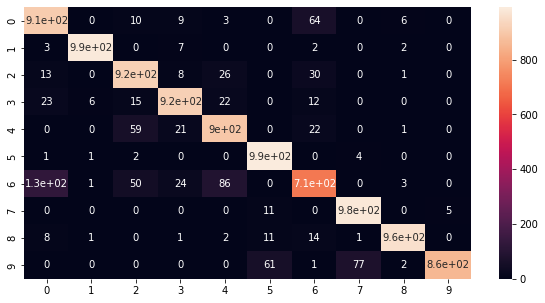

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sbn.heatmap(cm, annot=True)

In [ ]:
num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, y_pred, target_names=class_names)
print(cr)

              precision    recall  f1-score   support

     class 0       0.84      0.91      0.87      1000
     class 1       0.99      0.99      0.99      1000
     class 2       0.87      0.92      0.90      1000
     class 3       0.93      0.92      0.93      1000
     class 4       0.87      0.90      0.88      1000
     class 5       0.92      0.99      0.96      1000
     class 6       0.83      0.71      0.77      1000
     class 7       0.92      0.98      0.95      1000
     class 8       0.98      0.96      0.97      1000
     class 9       0.99      0.86      0.92      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

